# 3.4.2 Phones output

In [1]:
import allosaurus
from allosaurus.app import read_recognizer
model_fao = read_recognizer('fa2024')
phones = model_fao.recognize('audio/siga.wav', 'fao')
print(phones)

s iː j a


In [2]:
phones_timestamp = model_fao.recognize('audio/siga.wav', 'fao', timestamp=True)
print(phones_timestamp)

0.570 0.045 s
0.630 0.045 iː
0.810 0.045 j
0.900 0.045 a


In [3]:
phones_topk = model_fao.recognize('audio/siga.wav', 'fao', topk=3)
print(phones_topk)

s (0.959) f (0.036) sː (0.002) | iː (0.644) ɪ (0.229) i (0.059) | j (0.980) <blk> (0.019) eː (0.001) | a (0.976) <blk> (0.010) ɛ (0.008)


In [4]:
phones_emit1 = model_fao.recognize('audio/siga.wav', 'fao', emit=1)
print(phones_emit1)

phones_emit2 = model_fao.recognize('audio/siga.wav', 'fao', emit=0.7)
print(phones_emit2)

phones_emit3 = model_fao.recognize('audio/siga.wav', 'fao', emit=1.5)
print(phones_emit3)

s iː j a
s iː a
s iː eː j a n


# 3.4.3 Matrix output

In [5]:
from allosaurus.am.utils import *
from allosaurus.audio import read_audio

In [6]:
pm = read_recognizer('fa02024').pm
am = read_recognizer('fa02024').am
lm = read_recognizer('fa02024').lm
config = read_recognizer('fa2024').config

In [7]:
audio = read_audio('audio/audio_recording.wav')

feat = pm.compute(audio)
feats = np.expand_dims(feat, 0)
feat_len = np.array([feat.shape[0]], dtype=np.int32)

tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
print(tensor_batch_feat)

tensor([[[  0.8080,  -0.6796,   1.4728,  ...,   0.2015,   0.3173,   0.1837],
         [-13.1099,  -0.3547,   0.8017,  ...,   0.0574,   0.1538,   0.1800],
         [ -2.5913,  -0.7446,   0.7944,  ...,   0.5302,   0.2019,  -1.2298],
         ...,
         [  0.8160,   0.4558,  -0.5018,  ...,   0.6196,   0.5485,   1.1309],
         [  0.7555,   0.7384,   0.1924,  ...,  -0.1755,   0.0854,  -2.0373],
         [  0.6066,   0.0972,   0.0957,  ...,   1.2495,  -0.5744,  -0.2953]]])


In [8]:
tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)
print(tensor_batch_lprobs)

print('tensor_batch_lprobs second len: ', tensor_batch_lprobs.size(1))
print('tensor_batch_lprobs inner len: ', tensor_batch_lprobs.size(2))

tensor([[[ 1.0935e+01,  6.3017e-01,  1.3326e+00,  ...,  9.1242e-01,
           5.4564e-02, -7.2449e-01],
         [ 1.0700e+01,  1.6372e+00,  1.9867e+00,  ...,  1.2531e+00,
           9.8069e-02, -3.9778e-01],
         [ 8.7730e+00,  2.1705e+00,  2.7180e+00,  ...,  6.5274e-01,
           1.0437e-01, -1.0492e-01],
         ...,
         [ 9.4608e+00, -1.6215e-02,  3.6633e-02,  ..., -3.5979e-01,
          -3.5895e-04, -2.0133e+00],
         [ 1.1297e+01, -7.5651e-02,  7.8412e-01,  ..., -2.3407e-02,
           4.9175e-02, -1.1830e+00],
         [ 9.6707e+00,  7.9764e-01,  1.5023e+00,  ...,  2.6351e-01,
           8.2571e-02, -6.8497e-01]]], grad_fn=<TransposeBackward0>)
tensor_batch_lprobs second len:  293
tensor_batch_lprobs inner len:  73


In [9]:
highest_position = torch.max(tensor_batch_lprobs, dim=2)
print(highest_position)

torch.return_types.max(
values=tensor([[10.9351, 10.7004,  8.7730, 11.4859, 10.0915,  9.5709,  9.7015,  8.1202,
         11.2751,  8.7853,  9.3569,  8.4325,  7.4337, 10.1159,  9.3376,  8.1006,
          9.8603,  9.6193,  9.1868,  9.1201,  9.0882,  8.3163,  9.4305,  9.2517,
          9.0344,  9.4824,  9.0151,  8.8673, 10.1760, 10.3323,  9.2468,  9.5591,
          9.4196,  9.3128,  9.8249,  9.3084,  8.3857, 10.8938, 10.1764, 10.8897,
          8.3391,  9.8414,  9.4137,  5.3244,  9.9740,  9.0887, 10.9366,  9.7751,
          8.7054,  7.6775,  8.7043,  9.0862,  8.8486,  8.5861,  8.3651,  7.9671,
          9.3820,  9.7650,  9.7349, 10.3716,  6.9980, 10.8304,  9.4441,  9.6484,
          9.1254, 10.2038,  5.3854,  8.7393,  7.8734,  7.5697,  8.5363,  8.4917,
          9.2069, 10.3156,  6.9357,  9.5213,  9.9823, 11.1033, 11.9947,  8.0687,
         12.5057, 10.6067, 11.7715, 11.5460,  9.6351,  7.8864,  8.5646,  8.6990,
          8.2557,  8.7645,  7.0084, 10.3593,  9.5863,  6.5384,  9.5549,  8.807

In [10]:
with open("fao", "r") as file:
    fao_phones = file.read().splitlines()
    
fao_phones = '"' + " ".join(fao_phones) + '"'

# Find the index of the nth space
start_index = 0
find_index = 9
for _ in range(find_index-1):
    start_index = fao_phones.find(' ', start_index + 1)
# Find the index of the (n+1)th space
end_index = fao_phones.find(' ', start_index + 1)
# Extract the phone between the nth and (n+1)th space
desired_phone = fao_phones[start_index + 1:end_index]
print(desired_phone)

s


# 3.5.1 Euclidean distance

In [11]:
def prob_plot_matrix(audio):
    feat = pm.compute(audio)
    feats = np.expand_dims(feat, 0)
    feat_len = np.array([feat.shape[0]], dtype=np.int32)
    tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
    
    tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)
    # to get highest position
    sorted_tensor, indices = torch.sort(tensor_batch_lprobs, dim=2, descending=True)
    highest_position = indices[:,:,0]
    highest_position_array = highest_position.detach().numpy()

    # make array numpy
    np_array = tensor_batch_lprobs.detach().numpy()
    output_array = []

    for hp in highest_position_array:
        for idh, h in enumerate(hp):
            if h != 0:
                output_array.append(np_array[0][idh])

    # stack array vertically
    output_array = np.vstack(output_array)
    # wrap in another array
    output_array = np.array([output_array])
    
    return output_array

def pad_array(array, max_m):
    padding_size = max_m - array.shape[1]
    padding = ((0, 0), (0, padding_size), (0, 0))
    return np.pad(array, padding, mode='constant', constant_values=0)

In [12]:
mz1_audio = read_audio('audio/telja/Mialy_1.wav')
mz1_array = prob_plot_matrix(mz1_audio)
hk1_audio = read_audio('audio/telja/Herborg_1.wav')
hk1_array = prob_plot_matrix(hk1_audio)
mk1_audio = read_audio('audio/telja/Marna_1.wav')
mk1_array = prob_plot_matrix(mk1_audio)
ok1_audio = read_audio('audio/telja/Ola_1.wav')
ok1_array = prob_plot_matrix(ok1_audio)

mz2_audio = read_audio('audio/telja/Mialy_2.wav')
mz2_array = prob_plot_matrix(mz2_audio)
hk2_audio = read_audio('audio/telja/Herborg_2.wav')
hk2_array = prob_plot_matrix(hk2_audio)
mk2_audio = read_audio('audio/telja/Marna_2.wav')
mk2_array = prob_plot_matrix(mk2_audio)
ok2_audio = read_audio('audio/telja/Ola_2.wav')
ok2_array = prob_plot_matrix(ok2_audio)

# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array]

# Find the maximum length of phones
max_m = max(array.shape[1] for array in arrays)
print(max_m)

5


In [13]:
arrays_1 = [mz1_array, hk1_array, mk1_array, ok1_array]

# Pad all arrays to have the same shape
padded_arrays_1 = [pad_array(array, max_m) for array in arrays_1]
# Concatenate the padded arrays along the first dimension
data_matrices_1 = np.concatenate(padded_arrays_1, axis=0)

# mean of one
mean_1 = data_matrices_1.mean
mean_1 = np.array([mean_1(0)])
print(mean_1.shape)

(1, 5, 73)


In [14]:
arrays_2 = [mz2_array, hk2_array, mk2_array, ok2_array]

padded_arrays_2 = [pad_array(array, max_m) for array in arrays_2]
data_matrices_2 = np.concatenate(padded_arrays_2, axis=0)

In [15]:
diff_M1_T1_0 = [np.linalg.norm(mean_1[0][0]-data_matrices_1[0][0]), 
                np.linalg.norm(mean_1[0][1]-data_matrices_1[0][1]), 
                np.linalg.norm(mean_1[0][2]-data_matrices_1[0][2]), 
                np.linalg.norm(mean_1[0][3]-data_matrices_1[0][3]), 
                np.linalg.norm(mean_1[0][4]-data_matrices_1[0][4])]

print('Compare the distance of each phone:')
print('diff_M1_T1_0:', diff_M1_T1_0)

diff_M1_T2_0 = [np.linalg.norm(mean_1[0][0]-data_matrices_2[0][0]), 
                np.linalg.norm(mean_1[0][1]-data_matrices_2[0][1]), 
                np.linalg.norm(mean_1[0][2]-data_matrices_2[0][2]), 
                np.linalg.norm(mean_1[0][3]-data_matrices_2[0][3]), 
                np.linalg.norm(mean_1[0][4]-data_matrices_2[0][4])]

print('diff_M1_T2_0:', diff_M1_T2_0)

Compare the distance of each phone:
diff_M1_T1_0: [22.433569, 29.858173, 22.158379, 17.909498, 12.013623]
diff_M1_T2_0: [36.943043, 27.336575, 36.320854, 19.832037, 24.05522]


In [16]:
# NOT  IN THESIS
diff_M1_T1_0 = [np.linalg.norm(mean_1[0][0]-data_matrices_1[0][0]), np.linalg.norm(mean_1[0][1]-data_matrices_1[0][1]), np.linalg.norm(mean_1[0][2]-data_matrices_1[0][2]), np.linalg.norm(mean_1[0][3]-data_matrices_1[0][3]), np.linalg.norm(mean_1[0][4]-data_matrices_1[0][4])]
diff_M1_T1_1 = [np.linalg.norm(mean_1[0][0]-data_matrices_1[1][0]), np.linalg.norm(mean_1[0][1]-data_matrices_1[1][1]), np.linalg.norm(mean_1[0][2]-data_matrices_1[1][2]), np.linalg.norm(mean_1[0][3]-data_matrices_1[1][3]), np.linalg.norm(mean_1[0][4]-data_matrices_1[1][4])]
diff_M1_T1_2 = [np.linalg.norm(mean_1[0][0]-data_matrices_1[2][0]), np.linalg.norm(mean_1[0][1]-data_matrices_1[2][1]), np.linalg.norm(mean_1[0][2]-data_matrices_1[2][2]), np.linalg.norm(mean_1[0][3]-data_matrices_1[2][3]), np.linalg.norm(mean_1[0][4]-data_matrices_1[2][4])]
diff_M1_T1_3 = [np.linalg.norm(mean_1[0][0]-data_matrices_1[3][0]), np.linalg.norm(mean_1[0][1]-data_matrices_1[3][1]), np.linalg.norm(mean_1[0][2]-data_matrices_1[3][2]), np.linalg.norm(mean_1[0][3]-data_matrices_1[3][3]), np.linalg.norm(mean_1[0][4]-data_matrices_1[3][4])]

print('Compare the distance of each phone:')
print('mean of "one" and the first "one" (', model_fao.recognize('audio/telja/Mialy_1.wav'), '):', diff_M1_T1_0)
print('mean of "one" and the second "one" (', model_fao.recognize('audio/telja/Herborg_1.wav'), '):  ', diff_M1_T1_1)
print('mean of "one" and the third "one" (', model_fao.recognize('audio/telja/Marna_1.wav'), '):   ', diff_M1_T1_2)
print('mean of "one" and the fourth "one" (', model_fao.recognize('audio/telja/Ola_1.wav'), '):   ', diff_M1_T1_3, '\n')

diff_M1_T2_0 = [np.linalg.norm(mean_1[0][0]-data_matrices_2[0][0]), np.linalg.norm(mean_1[0][1]-data_matrices_2[0][1]), np.linalg.norm(mean_1[0][2]-data_matrices_2[0][2]), np.linalg.norm(mean_1[0][3]-data_matrices_2[0][3]), np.linalg.norm(mean_1[0][4]-data_matrices_2[0][4])]
print('mean of "one" and the first "two" (', model_fao.recognize('audio/telja/Mialy_2.wav'), '):   ', diff_M1_T2_0)

Compare the distance of each phone:
mean of "one" and the first "one" ( ɔ ʏ h ɪ s ): [22.433569, 29.858173, 22.158379, 17.909498, 12.013623]
mean of "one" and the second "one" ( a h d ɪ n ):   [10.07909, 9.273129, 16.54529, 21.388554, 12.070821]
mean of "one" and the third "one" ( a i ʃ d ɛ ):    [8.74827, 23.649485, 15.159152, 14.625042, 10.47639]
mean of "one" and the fourth "one" ( ɔ ʏ h tʰ ):    [9.009253, 11.622424, 13.688822, 13.69585, 24.05522] 

mean of "one" and the first "two" ( tʰ v ɛ ):    [36.943043, 27.336575, 36.320854, 19.832037, 24.05522]


In [17]:
print('Compare the distance between the words:')
print('Mean of "one" and the first "one":   ', np.linalg.norm(diff_M1_T1_0))
print('Mean of "one" and the second "one":  ', np.linalg.norm(diff_M1_T1_1))
print('Mean of "one" and the third "one":   ', np.linalg.norm(diff_M1_T1_2))
print('Mean of "one" and the fourth "one":  ', np.linalg.norm(diff_M1_T1_3), '\n')

print('Mean of "one" and the first "two":   ', np.linalg.norm(diff_M1_T2_0))

Compare the distance between the words:
Mean of "one" and the first "one":    48.48553
Mean of "one" and the second "one":   32.626682
Mean of "one" and the third "one":    34.485893
Mean of "one" and the fourth "one":   34.20323 

Mean of "one" and the first "two":    66.35694


# 3.5.2 Principal component analysis

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
def prob_plot_point(audio):
    feat = pm.compute(audio)
    feats = np.expand_dims(feat, 0)
    feat_len = np.array([feat.shape[0]], dtype=np.int32)
    tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
    
    tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)

    out_array = tensor_batch_lprobs.detach().numpy()
    out_array = np.vstack(out_array)
    out_array = np.array([out_array])
    
    return out_array

In [20]:
# NOT IN THESIS
mz1_audio_all = read_audio('audio/telja/Mialy_1.wav')
mz1_array_all = prob_plot_point(mz1_audio_all)
hk1_audio_all = read_audio('audio/telja/Herborg_1.wav')
hk1_array_all = prob_plot_point(hk1_audio_all)
mk1_audio_all = read_audio('audio/telja/Marna_1.wav')
mk1_array_all = prob_plot_point(mk1_audio_all)
ok1_audio_all = read_audio('audio/telja/Ola_1.wav')
ok1_array_all = prob_plot_point(ok1_audio_all)

mz2_audio_all = read_audio('audio/telja/Mialy_2.wav')
mz2_array_all = prob_plot_point(mz2_audio_all)
hk2_audio_all = read_audio('audio/telja/Herborg_2.wav')
hk2_array_all = prob_plot_point(hk2_audio_all)
mk2_audio_all = read_audio('audio/telja/Marna_2.wav')
mk2_array_all = prob_plot_point(mk2_audio_all)
ok2_audio_all = read_audio('audio/telja/Ola_2.wav')
ok2_array_all = prob_plot_point(ok2_audio_all)

# List of arrays
arrays_all = [mz1_array_all, hk1_array_all, mk1_array_all, ok1_array_all, mz2_array_all, hk2_array_all, mk2_array_all, ok2_array_all]

# Find the maximum length of phones
max_m_all = max(array.shape[1] for array in arrays_all)
print(max_m_all)

82


In [21]:
padded_arrays_all = [pad_array(array, max_m_all) for array in arrays_all]
data_matrices_all = np.concatenate(padded_arrays_all, axis=0)

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices_all])

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_vectors)

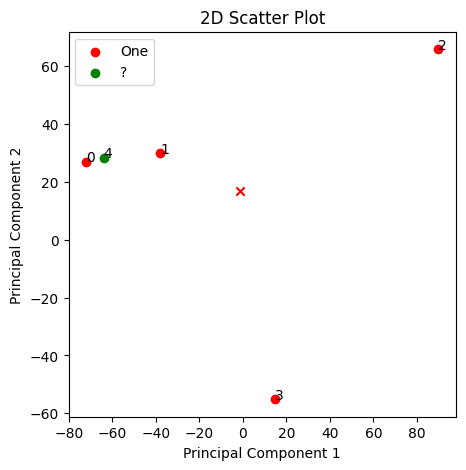

In [22]:
plt.figure(figsize=(5, 5))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
plt.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red', label='One')
plt.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
plt.scatter(data_pca[4:5, pca_pos1], data_pca[4:5, pca_pos2], c='green', label='?')
plt.title("2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices_all)-3)):
    plt.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))

plt.legend()
plt.show()

In [23]:
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(8, 5, 73)


In [24]:
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 10D
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_vectors)

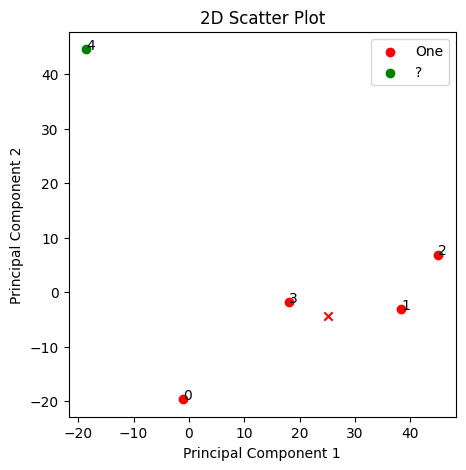

In [25]:
plt.figure(figsize=(5, 5))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
plt.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red', label='One')
plt.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
plt.scatter(data_pca[4:5, pca_pos1], data_pca[4:5, pca_pos2], c='green', label='?')
plt.title("2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices)-3)):
    plt.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))

plt.legend()
plt.show()

# 7.1 Confusion matrix

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [27]:
model = read_recognizer()
model_fao = read_recognizer('fa2024')

In [28]:
def evaluate_model(actual_phones, predicted):
    accuracy = accuracy_score(actual_phones, predicted)
    precision = precision_score(actual_phones, predicted, average='weighted', zero_division=0)
    recall = recall_score(actual_phones, predicted, average='weighted', zero_division=0)
    f1 = f1_score(actual_phones, predicted, average='weighted', zero_division=0)
    labels = np.unique(np.concatenate((actual_phones, predicted)))
    cm = confusion_matrix(actual_phones, predicted, labels= labels)
    return accuracy, precision, recall, f1, cm, labels

def display_metrics(accuracy, precision, recall, f1):
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

def display_predictions(predicted_phones):
    print("Predicted Phones:")
    print(" ".join(predicted_phones))

def display_confusion_matrix(cm, labels, row):
    #plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, row)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    #plt.show()
    return plt

In [29]:
print('Faroese word: "Skaffa"')
print('Actual phones:               s g a fː a')
phones = model.recognize('audio/Skaffa.wav', 'fao')
print('Predicted phones(IPA model):', phones)
phones_fao = model_fao.recognize('audio/Skaffa.wav', 'fao')
print('Predicted phones(fao model):', phones_fao)

Faroese word: "Skaffa"
Actual phones:               s g a fː a
Predicted phones(IPA model): j ɛ s o n
Predicted phones(fao model): s g ɛ s ɛ


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.40
Precision: 1.00
Recall: 0.40
F1 Score: 0.57


<function matplotlib.pyplot.show(close=None, block=None)>

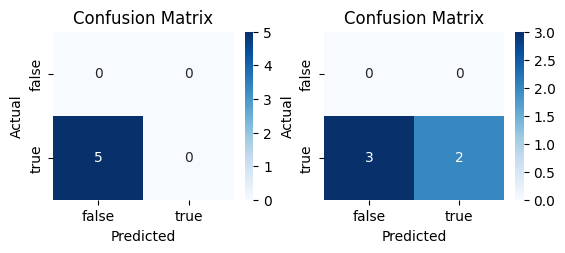

In [30]:
# Skaffa: s g a fː a -> j ɛ s o n
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Skaffa: s g a fː a -> s g ɛ s ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)
                        

plt.show

In [31]:
print('Faroese word: "Desember"')
print('Actual phones:               d ɪ s ɛ m b ɪ ɹ')
phones = model.recognize('audio/Desember.wav', 'fao')
print('Predicted phones(IPA model):', phones)
phones_fao = model_fao.recognize('audio/Desember.wav', 'fao')
print('Predicted phones(fao model):', phones_fao)

Faroese word: "Desember"
Actual phones:               d ɪ s ɛ m b ɪ ɹ
Predicted phones(IPA model): ð ə s ɛ m ɹ ɛ
Predicted phones(fao model): d ɪ s ɛ m b ɪ


Accuracy: 0.38
Precision: 1.00
Recall: 0.38
F1 Score: 0.55
Accuracy: 0.88
Precision: 1.00
Recall: 0.88
F1 Score: 0.93


<function matplotlib.pyplot.show(close=None, block=None)>

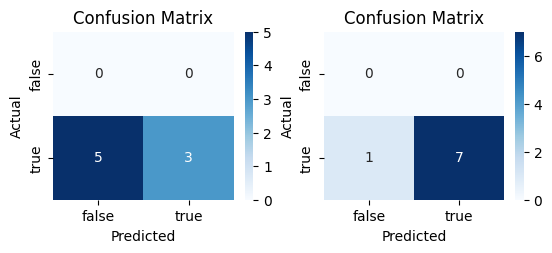

In [32]:
# Desember: d ɪ s ɛ m b ɪ ɹ -> ð ə s ɛ m ɹ ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'true', 'true', 'true', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Desember: d ɪ s ɛ m b ɪ ɹ -> d ɪ s ɛ m b ɪ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

In [33]:
print('Faroese word: "Song"')
print('Actual phones:               s ɔ ŋ g')
phones = model.recognize('audio/Song.wav', 'fao')
print('Predicted phones(IPA model):', phones)
phones_fao = model_fao.recognize('audio/Song.wav', 'fao')
print('Predicted phones(fao model):', phones_fao)

Faroese word: "Song"
Actual phones:               s ɔ ŋ g
Predicted phones(IPA model): s ɔ w
Predicted phones(fao model): s ɔ ŋ g


Accuracy: 0.50
Precision: 1.00
Recall: 0.50
F1 Score: 0.67
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

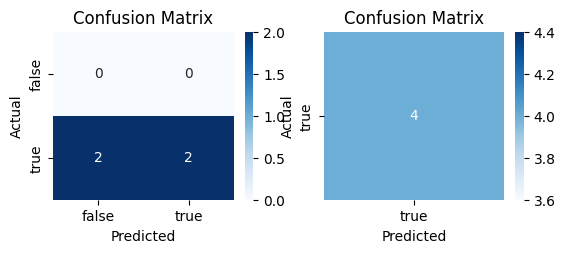

In [34]:
# Song: s ɔ ŋ g -> s ɔ w
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Song: s ɔ ŋ g -> s ɔ ŋ g
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'true', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.29
Precision: 1.00
Recall: 0.29
F1 Score: 0.45
Accuracy: 0.76
Precision: 1.00
Recall: 0.76
F1 Score: 0.87


<function matplotlib.pyplot.show(close=None, block=None)>

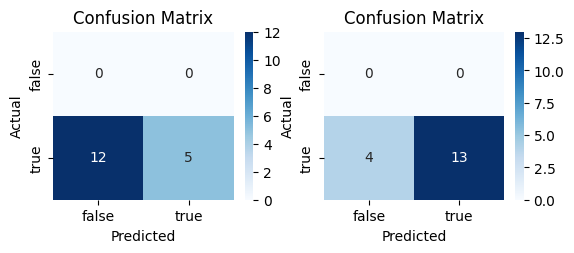

In [35]:
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'false', 'false', 'false', 'false', 'false', 'true', 'true', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Skaffa: s g a fː a -> s g ɛ s ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'false', 'false', 'false', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'false', 'true', 'true', 'true', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)
                        

plt.show

# 7.2 Euclidean distance

In [36]:
mz1_audio = read_audio('audio/telja/Mialy_1.wav')
mz1_array = prob_plot_matrix(mz1_audio)
hk1_audio = read_audio('audio/telja/Herborg_1.wav')
hk1_array = prob_plot_matrix(hk1_audio)
mk1_audio = read_audio('audio/telja/Marna_1.wav')
mk1_array = prob_plot_matrix(mk1_audio)
ok1_audio = read_audio('audio/telja/Ola_1.wav')
ok1_array = prob_plot_matrix(ok1_audio)

mz2_audio = read_audio('audio/telja/Mialy_2.wav')
mz2_array = prob_plot_matrix(mz2_audio)
hk2_audio = read_audio('audio/telja/Herborg_2.wav')
hk2_array = prob_plot_matrix(hk2_audio)
mk2_audio = read_audio('audio/telja/Marna_2.wav')
mk2_array = prob_plot_matrix(mk2_audio)
ok2_audio = read_audio('audio/telja/Ola_2.wav')
ok2_array = prob_plot_matrix(ok2_audio)

mz3_audio = read_audio('audio/telja/Mialy_3.wav')
mz3_array = prob_plot_matrix(mz3_audio)
hk3_audio = read_audio('audio/telja/Herborg_3.wav')
hk3_array = prob_plot_matrix(hk3_audio)
mk3_audio = read_audio('audio/telja/Marna_3.wav')
mk3_array = prob_plot_matrix(mk3_audio)
ok3_audio = read_audio('audio/telja/Ola_3.wav')
ok3_array = prob_plot_matrix(ok3_audio)

mz4_audio = read_audio('audio/telja/Mialy_4.wav')
mz4_array = prob_plot_matrix(mz4_audio)
hk4_audio = read_audio('audio/telja/Herborg_4.wav')
hk4_array = prob_plot_matrix(hk4_audio)
mk4_audio = read_audio('audio/telja/Marna_4.wav')
mk4_array = prob_plot_matrix(mk4_audio)
ok4_audio = read_audio('audio/telja/Ola_4.wav')
ok4_array = prob_plot_matrix(ok4_audio)

mz5_audio = read_audio('audio/telja/Mialy_5.wav')
mz5_array = prob_plot_matrix(mz5_audio)
hk5_audio = read_audio('audio/telja/Herborg_5.wav')
hk5_array = prob_plot_matrix(hk5_audio)
mk5_audio = read_audio('audio/telja/Marna_5.wav')
mk5_array = prob_plot_matrix(mk5_audio)
ok5_audio = read_audio('audio/telja/Ola_5.wav')
ok5_array = prob_plot_matrix(ok5_audio)

mz6_audio = read_audio('audio/telja/Mialy_6.wav')
mz6_array = prob_plot_matrix(mz6_audio)
hk6_audio = read_audio('audio/telja/Herborg_6.wav')
hk6_array = prob_plot_matrix(hk6_audio)
mk6_audio = read_audio('audio/telja/Marna_6.wav')
mk6_array = prob_plot_matrix(mk6_audio)
ok6_audio = read_audio('audio/telja/Ola_6.wav')
ok6_array = prob_plot_matrix(ok6_audio)

mz7_audio = read_audio('audio/telja/Mialy_7.wav')
mz7_array = prob_plot_matrix(mz7_audio)
hk7_audio = read_audio('audio/telja/Herborg_7.wav')
hk7_array = prob_plot_matrix(hk7_audio)
mk7_audio = read_audio('audio/telja/Marna_7.wav')
mk7_array = prob_plot_matrix(mk7_audio)
ok7_audio = read_audio('audio/telja/Ola_7.wav')
ok7_array = prob_plot_matrix(ok7_audio)

mz8_audio = read_audio('audio/telja/Mialy_8.wav')
mz8_array = prob_plot_matrix(mz8_audio)
hk8_audio = read_audio('audio/telja/Herborg_8.wav')
hk8_array = prob_plot_matrix(hk8_audio)
mk8_audio = read_audio('audio/telja/Marna_8.wav')
mk8_array = prob_plot_matrix(mk8_audio)
ok8_audio = read_audio('audio/telja/Ola_8.wav')
ok8_array = prob_plot_matrix(ok8_audio)

mz9_audio = read_audio('audio/telja/Mialy_9.wav')
mz9_array = prob_plot_matrix(mz9_audio)
hk9_audio = read_audio('audio/telja/Herborg_9.wav')
hk9_array = prob_plot_matrix(hk9_audio)
mk9_audio = read_audio('audio/telja/Marna_9.wav')
mk9_array = prob_plot_matrix(mk9_audio)
ok9_audio = read_audio('audio/telja/Ola_9.wav')
ok9_array = prob_plot_matrix(ok9_audio)

mz10_audio = read_audio('audio/telja/Mialy_10.wav')
mz10_array = prob_plot_matrix(mz10_audio)
hk10_audio = read_audio('audio/telja/Herborg_10.wav')
hk10_array = prob_plot_matrix(hk10_audio)
mk10_audio = read_audio('audio/telja/Marna_10.wav')
mk10_array = prob_plot_matrix(mk10_audio)
ok10_audio = read_audio('audio/telja/Ola_10.wav')
ok10_array = prob_plot_matrix(ok10_audio)

# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array, mz4_array, hk4_array, mk4_array, ok4_array, mz5_array, hk5_array, mk5_array, ok5_array, mz6_array, hk6_array, mk6_array, ok6_array, mz7_array, hk7_array, mk7_array, ok7_array, mz8_array, hk8_array, mk8_array, ok8_array, mz9_array, hk9_array, mk9_array, ok9_array, mz10_array, hk10_array, mk10_array, ok10_array]

# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)

In [37]:
arrays_A = [mz1_array, hk1_array, mk1_array, ok1_array]

# Pad all arrays to have the same shape
padded_arrays_A = [pad_array(array, max_m) for array in arrays_A]

# Concatenate the padded arrays along the first dimension
data_matrices_A = np.concatenate(padded_arrays_A, axis=0)

# mean of A
mean_A = data_matrices_A.mean
mean_A = np.array([mean_A(0)])
#print(mean_A)
print(mean_A.shape)

(1, 6, 73)


In [38]:
arrays_B = [mz2_array, hk2_array, mk2_array, ok2_array]

# Pad all arrays to have the same shape
padded_arrays_B = [pad_array(array, max_m) for array in arrays_B]

# Concatenate the padded arrays along the first dimension
data_matrices_B = np.concatenate(padded_arrays_B, axis=0)

# mean of A
mean_B = data_matrices_B.mean
mean_B = np.array([mean_B(0)])

#print(mean_B)
print(mean_B.shape)

(1, 6, 73)


In [39]:
arrays_C = [mz3_array, hk3_array, mk3_array, ok3_array]

# Pad all arrays to have the same shape
padded_arrays_C = [pad_array(array, max_m) for array in arrays_C]

# Concatenate the padded arrays along the first dimension
data_matrices_C = np.concatenate(padded_arrays_C, axis=0)

# mean of A
mean_C = data_matrices_C.mean
mean_C = np.array([mean_C(0)])

#print(mean_C)
print(mean_C.shape)

(1, 6, 73)


In [40]:
arrays_D = [mz4_array, hk4_array, mk4_array, ok4_array]

# Pad all arrays to have the same shape
padded_arrays_D = [pad_array(array, max_m) for array in arrays_D]

# Concatenate the padded arrays along the first dimension
data_matrices_D = np.concatenate(padded_arrays_D, axis=0)

# mean of A
mean_D = data_matrices_D.mean
mean_D = np.array([mean_D(0)])

#print(mean_D)
print(mean_D.shape)

(1, 6, 73)


In [41]:
arrays_E = [mz5_array, hk5_array, mk5_array, ok5_array]

# Pad all arrays to have the same shape
padded_arrays_E = [pad_array(array, max_m) for array in arrays_E]

# Concatenate the padded arrays along the first dimension
data_matrices_E = np.concatenate(padded_arrays_E, axis=0)

# mean of A
mean_E = data_matrices_E.mean
mean_E = np.array([mean_E(0)])

#print(mean_E)
print(mean_E.shape)

(1, 6, 73)


In [42]:
arrays_F = [mz6_array, hk6_array, mk6_array, ok6_array]

# Pad all arrays to have the same shape
padded_arrays_F = [pad_array(array, max_m) for array in arrays_F]

# Concatenate the padded arrays along the first dimension
data_matrices_F = np.concatenate(padded_arrays_F, axis=0)

# mean of A
mean_F = data_matrices_F.mean
mean_F = np.array([mean_F(0)])

#print(mean_F)
print(mean_F.shape)

(1, 6, 73)


In [43]:
arrays_G = [mz7_array, hk7_array, mk7_array, ok7_array]

# Pad all arrays to have the same shape
padded_arrays_G = [pad_array(array, max_m) for array in arrays_G]

# Concatenate the padded arrays along the first dimension
data_matrices_G = np.concatenate(padded_arrays_G, axis=0)

# mean of A
mean_G = data_matrices_G.mean
mean_G = np.array([mean_G(0)])

#print(mean_G)
print(mean_G.shape)

(1, 6, 73)


In [44]:
arrays_H = [mz8_array, hk8_array, mk8_array, ok8_array]

# Pad all arrays to have the same shape
padded_arrays_H = [pad_array(array, max_m) for array in arrays_H]

# Concatenate the padded arrays along the first dimension
data_matrices_H = np.concatenate(padded_arrays_H, axis=0)

# mean of A
mean_H = data_matrices_H.mean
mean_H = np.array([mean_H(0)])

#print(mean_H)
print(mean_H.shape)

(1, 6, 73)


In [45]:
arrays_I = [mz9_array, hk9_array, mk9_array, ok9_array]

# Pad all arrays to have the same shape
padded_arrays_I = [pad_array(array, max_m) for array in arrays_I]

# Concatenate the padded arrays along the first dimension
data_matrices_I = np.concatenate(padded_arrays_I, axis=0)

# mean of A
mean_I = data_matrices_I.mean
mean_I = np.array([mean_I(0)])

#print(mean_I)
print(mean_I.shape)

(1, 6, 73)


In [46]:
arrays_J = [mz10_array, hk10_array, mk10_array, ok10_array]

# Pad all arrays to have the same shape
padded_arrays_J = [pad_array(array, max_m) for array in arrays_J]

# Concatenate the padded arrays along the first dimension
data_matrices_J = np.concatenate(padded_arrays_J, axis=0)

# mean of A
mean_J = data_matrices_J.mean
mean_J = np.array([mean_J(0)])

#print(mean_J)
print(mean_J.shape)

(1, 6, 73)


In [47]:
def e_d(mean_C, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J):
    diff_C_A0 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[0][5])]
    diff_C_A1 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[1][5])]
    diff_C_A2 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[2][5])]
    diff_C_A3 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[3][5])]
    
    diff_C_B0 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[0][5])]
    diff_C_B1 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[1][5])]
    diff_C_B2 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[2][5])]
    diff_C_B3 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[3][5])]
    
    diff_C_C0 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[0][5])]
    diff_C_C1 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[1][5])]
    diff_C_C2 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[2][5])]
    diff_C_C3 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[3][5])]
    
    diff_C_D0 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[0][5])]
    diff_C_D1 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[1][5])]
    diff_C_D2 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[2][5])]
    diff_C_D3 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[3][5])]
    
    diff_C_E0 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[0][5])]
    diff_C_E1 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[1][5])]
    diff_C_E2 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[2][5])]
    diff_C_E3 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[3][5])]

    diff_C_F0 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[0][5])]
    diff_C_F1 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[1][5])]
    diff_C_F2 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[2][5])]
    diff_C_F3 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[3][5])]
    
    diff_C_G0 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[0][5])]
    diff_C_G1 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[1][5])]
    diff_C_G2 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[2][5])]
    diff_C_G3 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[3][5])]
    
    diff_C_H0 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[0][5])]
    diff_C_H1 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[1][5])]
    diff_C_H2 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[2][5])]
    diff_C_H3 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[3][5])]
    
    diff_C_I0 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[0][5])]
    diff_C_I1 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[1][5])]
    diff_C_I2 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[2][5])]
    diff_C_I3 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[3][5])]
    
    diff_C_J0 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[0][5])]
    diff_C_J1 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[1][5])]
    diff_C_J2 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[2][5])]
    diff_C_J3 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[3][5])]
    
    print('Euclidian distance of the whole words between...')
    print('mean of all "three" and first "one":   ', np.linalg.norm(diff_C_A0))
    print('mean of all "three" and second "one":  ', np.linalg.norm(diff_C_A1))
    print('mean of all "three" and third "one":   ', np.linalg.norm(diff_C_A2))
    print('mean of all "three" and fourth "one":  ', np.linalg.norm(diff_C_A3), '\n')
    
    print('mean of all "three" and first "two":   ', np.linalg.norm(diff_C_B0))
    print('mean of all "three" and second "two":  ', np.linalg.norm(diff_C_B1))
    print('mean of all "three" and third "two":   ', np.linalg.norm(diff_C_B2))
    print('mean of all "three" and fourth "two":  ', np.linalg.norm(diff_C_B3), '\n')
    
    print('mean of all "three" and first "three": ', np.linalg.norm(diff_C_C0))
    print('mean of all "three" and second "three":', np.linalg.norm(diff_C_C1))
    print('mean of all "three" and third "three": ', np.linalg.norm(diff_C_C2))
    print('mean of all "three" and fourth "three":', np.linalg.norm(diff_C_C3), '\n')
    
    print('mean of all "three" and first "four":  ', np.linalg.norm(diff_C_D0))
    print('mean of all "three" and second "four": ', np.linalg.norm(diff_C_D1))
    print('mean of all "three" and third "four":  ', np.linalg.norm(diff_C_D2))
    print('mean of all "three" and fourth "four": ', np.linalg.norm(diff_C_D3), '\n')
    
    print('mean of all "three" and first "five":  ', np.linalg.norm(diff_C_E0))
    print('mean of all "three" and second "five": ', np.linalg.norm(diff_C_E1))
    print('mean of all "three" and third "five":  ', np.linalg.norm(diff_C_E2))
    print('mean of all "three" and fourth "five": ', np.linalg.norm(diff_C_E3), '\n')
    
    print('mean of all "three" and first "six":   ', np.linalg.norm(diff_C_F0))
    print('mean of all "three" and second "six":  ', np.linalg.norm(diff_C_F1))
    print('mean of all "three" and third "six":   ', np.linalg.norm(diff_C_F2))
    print('mean of all "three" and fourth "six":  ', np.linalg.norm(diff_C_F3), '\n')
    
    print('mean of all "three" and first "seven": ', np.linalg.norm(diff_C_G0))
    print('mean of all "three" and second "seven":', np.linalg.norm(diff_C_G1))
    print('mean of all "three" and third "seven": ', np.linalg.norm(diff_C_G2))
    print('mean of all "three" and fourth "seven":', np.linalg.norm(diff_C_G3), '\n')
    
    print('mean of all "three" and first "eight": ', np.linalg.norm(diff_C_H0))
    print('mean of all "three" and second "eight":', np.linalg.norm(diff_C_H1))
    print('mean of all "three" and third "eight": ', np.linalg.norm(diff_C_H2))
    print('mean of all "three" and fourth "eight":', np.linalg.norm(diff_C_H3), '\n')
    
    print('mean of all "three" and first "nine":  ', np.linalg.norm(diff_C_I0))
    print('mean of all "three" and second "nine": ', np.linalg.norm(diff_C_I1))
    print('mean of all "three" and third "nine":  ', np.linalg.norm(diff_C_I2))
    print('mean of all "three" and fourth "nine": ', np.linalg.norm(diff_C_I3), '\n')
    
    print('mean of all "three" and first "ten":   ', np.linalg.norm(diff_C_J0))
    print('mean of all "three" and second "ten":  ', np.linalg.norm(diff_C_J1))
    print('mean of all "three" and third "ten":   ', np.linalg.norm(diff_C_J2))
    print('mean of all "three" and fourth "ten":  ', np.linalg.norm(diff_C_J3), '\n')

In [48]:
e_d(mean_A, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    48.48553
mean of all "three" and second "one":   32.626682
mean of all "three" and third "one":    34.485893
mean of all "three" and fourth "one":   34.20323 

mean of all "three" and first "two":    66.35694
mean of all "three" and second "two":   60.457104
mean of all "three" and third "two":    57.034924
mean of all "three" and fourth "two":   62.737534 

mean of all "three" and first "three":  69.59192
mean of all "three" and second "three": 63.00841
mean of all "three" and third "three":  69.32543
mean of all "three" and fourth "three": 71.57131 

mean of all "three" and first "four":   69.343285
mean of all "three" and second "four":  75.046616
mean of all "three" and third "four":   80.78472
mean of all "three" and fourth "four":  62.577866 

mean of all "three" and first "five":   63.425735
mean of all "three" and second "five":  64.32182
mean of all "three" and third "five":   59.15757
mea

In [49]:
e_d(mean_B, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    58.726974
mean of all "three" and second "one":   69.70919
mean of all "three" and third "one":    73.84333
mean of all "three" and fourth "one":   54.226875 

mean of all "three" and first "two":    44.081112
mean of all "three" and second "two":   26.771725
mean of all "three" and third "two":    30.884481
mean of all "three" and fourth "two":   26.578785 

mean of all "three" and first "three":  43.504986
mean of all "three" and second "three": 33.75641
mean of all "three" and third "three":  59.580425
mean of all "three" and fourth "three": 50.956146 

mean of all "three" and first "four":   48.421383
mean of all "three" and second "four":  58.53715
mean of all "three" and third "four":   64.20394
mean of all "three" and fourth "four":  52.819336 

mean of all "three" and first "five":   40.65416
mean of all "three" and second "five":  39.788036
mean of all "three" and third "five":   71.21431


In [50]:
e_d(mean_C, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    67.9484
mean of all "three" and second "one":   76.43324
mean of all "three" and third "one":    81.20235
mean of all "three" and fourth "one":   62.76895 

mean of all "three" and first "two":    42.74348
mean of all "three" and second "two":   49.092194
mean of all "three" and third "two":    57.27641
mean of all "three" and fourth "two":   49.576115 

mean of all "three" and first "three":  29.622673
mean of all "three" and second "three": 26.64253
mean of all "three" and third "three":  36.483402
mean of all "three" and fourth "three": 24.594618 

mean of all "three" and first "four":   56.86344
mean of all "three" and second "four":  59.99927
mean of all "three" and third "four":   65.75019
mean of all "three" and fourth "four":  56.92652 

mean of all "three" and first "five":   58.700214
mean of all "three" and second "five":  55.853073
mean of all "three" and third "five":   63.102203
mean 

In [51]:
e_d(mean_D, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    55.27368
mean of all "three" and second "one":   76.134796
mean of all "three" and third "one":    82.75406
mean of all "three" and fourth "one":   73.49383 

mean of all "three" and first "two":    58.907764
mean of all "three" and second "two":   52.887016
mean of all "three" and third "two":    54.649
mean of all "three" and fourth "two":   46.83874 

mean of all "three" and first "three":  47.23497
mean of all "three" and second "three": 41.74303
mean of all "three" and third "three":  69.387375
mean of all "three" and fourth "three": 59.80169 

mean of all "three" and first "four":   49.392075
mean of all "three" and second "four":  29.079569
mean of all "three" and third "four":   39.570557
mean of all "three" and fourth "four":  26.548836 

mean of all "three" and first "five":   58.15181
mean of all "three" and second "five":  58.440025
mean of all "three" and third "five":   81.27304
mean 

In [52]:
e_d(mean_E, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    63.30821
mean of all "three" and second "one":   68.93368
mean of all "three" and third "one":    68.241325
mean of all "three" and fourth "one":   51.61559 

mean of all "three" and first "two":    58.958904
mean of all "three" and second "two":   36.19573
mean of all "three" and third "two":    42.38319
mean of all "three" and fourth "two":   45.07683 

mean of all "three" and first "three":  45.74411
mean of all "three" and second "three": 39.118
mean of all "three" and third "three":  65.9209
mean of all "three" and fourth "three": 60.849873 

mean of all "three" and first "four":   56.50197
mean of all "three" and second "four":  67.43461
mean of all "three" and third "four":   70.949135
mean of all "three" and fourth "four":  61.616787 

mean of all "three" and first "five":   23.191156
mean of all "three" and second "five":  22.161188
mean of all "three" and third "five":   63.007645
mean of

In [53]:
e_d(mean_F, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    69.8878
mean of all "three" and second "one":   74.87499
mean of all "three" and third "one":    77.2779
mean of all "three" and fourth "one":   56.246834 

mean of all "three" and first "two":    64.506996
mean of all "three" and second "two":   21.780989
mean of all "three" and third "two":    33.48613
mean of all "three" and fourth "two":   43.37109 

mean of all "three" and first "three":  48.27121
mean of all "three" and second "three": 40.217213
mean of all "three" and third "three":  70.591896
mean of all "three" and fourth "three": 64.03517 

mean of all "three" and first "four":   54.79945
mean of all "three" and second "four":  66.5939
mean of all "three" and third "four":   72.09667
mean of all "three" and fourth "four":  63.681248 

mean of all "three" and first "five":   34.519264
mean of all "three" and second "five":  33.279957
mean of all "three" and third "five":   79.472305
mean o

In [54]:
e_d(mean_G, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    66.05708
mean of all "three" and second "one":   72.851585
mean of all "three" and third "one":    74.24208
mean of all "three" and fourth "one":   58.654034 

mean of all "three" and first "two":    59.871613
mean of all "three" and second "two":   26.720419
mean of all "three" and third "two":    40.999043
mean of all "three" and fourth "two":   45.53448 

mean of all "three" and first "three":  43.99394
mean of all "three" and second "three": 38.561558
mean of all "three" and third "three":  67.48474
mean of all "three" and fourth "three": 57.135044 

mean of all "three" and first "four":   54.483295
mean of all "three" and second "four":  60.124084
mean of all "three" and third "four":   69.19048
mean of all "three" and fourth "four":  56.9023 

mean of all "three" and first "five":   41.186897
mean of all "three" and second "five":  38.730087
mean of all "three" and third "five":   76.867516
m

In [55]:
e_d(mean_H, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    89.072914
mean of all "three" and second "one":   58.361473
mean of all "three" and third "one":    61.05095
mean of all "three" and fourth "one":   53.842957 

mean of all "three" and first "two":    77.221405
mean of all "three" and second "two":   82.82986
mean of all "three" and third "two":    80.96527
mean of all "three" and fourth "two":   82.497185 

mean of all "three" and first "three":  91.958916
mean of all "three" and second "three": 86.13766
mean of all "three" and third "three":  72.15231
mean of all "three" and fourth "three": 83.97781 

mean of all "three" and first "four":   75.90938
mean of all "three" and second "four":  107.157814
mean of all "three" and third "four":   104.134445
mean of all "three" and fourth "four":  95.52142 

mean of all "three" and first "five":   81.024994
mean of all "three" and second "five":  82.2057
mean of all "three" and third "five":   74.07959
me

In [56]:
e_d(mean_I, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    65.84848
mean of all "three" and second "one":   62.234386
mean of all "three" and third "one":    77.74821
mean of all "three" and fourth "one":   61.496223 

mean of all "three" and first "two":    71.3732
mean of all "three" and second "two":   50.744923
mean of all "three" and third "two":    47.29202
mean of all "three" and fourth "two":   54.143383 

mean of all "three" and first "three":  60.26125
mean of all "three" and second "three": 53.88012
mean of all "three" and third "three":  67.92448
mean of all "three" and fourth "three": 65.621605 

mean of all "three" and first "four":   51.498463
mean of all "three" and second "four":  71.55019
mean of all "three" and third "four":   74.64252
mean of all "three" and fourth "four":  65.37661 

mean of all "three" and first "five":   58.905693
mean of all "three" and second "five":  59.106174
mean of all "three" and third "five":   81.46155
mean 

In [57]:
e_d(mean_J, data_matrices_A, data_matrices_B, data_matrices_C, data_matrices_D, data_matrices_E, data_matrices_F, data_matrices_G, data_matrices_H, data_matrices_I, data_matrices_J)


Euclidian distance of the whole words between...
mean of all "three" and first "one":    60.862835
mean of all "three" and second "one":   63.99175
mean of all "three" and third "one":    73.92263
mean of all "three" and fourth "one":   62.803497 

mean of all "three" and first "two":    60.439434
mean of all "three" and second "two":   38.811436
mean of all "three" and third "two":    48.961807
mean of all "three" and fourth "two":   46.185284 

mean of all "three" and first "three":  50.741264
mean of all "three" and second "three": 44.208927
mean of all "three" and third "three":  64.29343
mean of all "three" and fourth "three": 56.503834 

mean of all "three" and first "four":   45.917347
mean of all "three" and second "four":  54.780804
mean of all "three" and third "four":   65.314476
mean of all "three" and fourth "four":  52.10596 

mean of all "three" and first "five":   49.81644
mean of all "three" and second "five":  48.924793
mean of all "three" and third "five":   81.08419

In [58]:
diff_E0_E1 = [np.linalg.norm(data_matrices_E[0][0]-data_matrices_E[1][0]), np.linalg.norm(data_matrices_E[0][1]-data_matrices_E[1][1]), np.linalg.norm(data_matrices_E[0][2]-data_matrices_E[1][2]), np.linalg.norm(data_matrices_E[0][3]-data_matrices_E[1][3]), np.linalg.norm(data_matrices_E[0][4]-data_matrices_E[1][4]), np.linalg.norm(data_matrices_E[0][5]-data_matrices_E[1][5])]
diff_E0_E2 = [np.linalg.norm(data_matrices_E[0][0]-data_matrices_E[2][0]), np.linalg.norm(data_matrices_E[0][1]-data_matrices_E[2][1]), np.linalg.norm(data_matrices_E[0][2]-data_matrices_E[2][2]), np.linalg.norm(data_matrices_E[0][3]-data_matrices_E[2][3]), np.linalg.norm(data_matrices_E[0][4]-data_matrices_E[2][4]), np.linalg.norm(data_matrices_E[0][5]-data_matrices_E[2][5])]
diff_E0_E3 = [np.linalg.norm(data_matrices_E[0][0]-data_matrices_E[3][0]), np.linalg.norm(data_matrices_E[0][1]-data_matrices_E[3][1]), np.linalg.norm(data_matrices_E[0][2]-data_matrices_E[3][2]), np.linalg.norm(data_matrices_E[0][3]-data_matrices_E[3][3]), np.linalg.norm(data_matrices_E[0][4]-data_matrices_E[3][4]), np.linalg.norm(data_matrices_E[0][5]-data_matrices_E[3][5])]

diff_E1_E2 = [np.linalg.norm(data_matrices_E[1][0]-data_matrices_E[2][0]), np.linalg.norm(data_matrices_E[1][1]-data_matrices_E[2][1]), np.linalg.norm(data_matrices_E[1][2]-data_matrices_E[2][2]), np.linalg.norm(data_matrices_E[1][3]-data_matrices_E[2][3]), np.linalg.norm(data_matrices_E[1][4]-data_matrices_E[2][4]), np.linalg.norm(data_matrices_E[1][5]-data_matrices_E[2][5])]
diff_E1_E3 = [np.linalg.norm(data_matrices_E[1][0]-data_matrices_E[3][0]), np.linalg.norm(data_matrices_E[1][1]-data_matrices_E[3][1]), np.linalg.norm(data_matrices_E[1][2]-data_matrices_E[3][2]), np.linalg.norm(data_matrices_E[1][3]-data_matrices_E[3][3]), np.linalg.norm(data_matrices_E[1][4]-data_matrices_E[3][4]), np.linalg.norm(data_matrices_E[1][5]-data_matrices_E[3][5])]
diff_E2_E3 = [np.linalg.norm(data_matrices_E[2][0]-data_matrices_E[3][0]), np.linalg.norm(data_matrices_E[2][1]-data_matrices_E[3][1]), np.linalg.norm(data_matrices_E[2][2]-data_matrices_E[3][2]), np.linalg.norm(data_matrices_E[2][3]-data_matrices_E[3][3]), np.linalg.norm(data_matrices_E[2][4]-data_matrices_E[3][4]), np.linalg.norm(data_matrices_E[2][5]-data_matrices_E[3][5])]

print('Look at C5 column')
print('T3 "5" - T1 "5":', np.linalg.norm(diff_E0_E2))
print('T3 "5" - T2 "5":', np.linalg.norm(diff_E1_E2))
print('T3 "5" - T4 "5":', np.linalg.norm(diff_E2_E3))

print('T1 "5" - T2 "5":', np.linalg.norm(diff_E0_E1))
print('T1 "5" - T4 "5":', np.linalg.norm(diff_E0_E3))
print('T2 "5" - T4 "5":', np.linalg.norm(diff_E1_E3))

Look at C5 column
T3 "5" - T1 "5": 85.182686
T3 "5" - T2 "5": 83.53232
T3 "5" - T4 "5": 84.643875
T1 "5" - T2 "5": 15.602404
T1 "5" - T4 "5": 13.048615
T2 "5" - T4 "5": 16.182161


In [59]:
diff_B0_E0 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_E[0][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_E[0][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_E[0][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_E[0][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_E[0][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_E[0][5])]
diff_B0_E1 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_E[1][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_E[1][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_E[1][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_E[1][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_E[1][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_E[1][5])]
diff_B0_E2 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_E[2][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_E[2][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_E[2][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_E[2][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_E[2][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_E[2][5])]
diff_B0_E3 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_E[3][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_E[3][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_E[3][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_E[3][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_E[3][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_E[3][5])]
print('Look at C5 column')
print('T1 "2" - T1 "5":', np.linalg.norm(diff_B0_E0))
print('T1 "2" - T2 "5":', np.linalg.norm(diff_B0_E1))
print('T1 "2" - T3 "5":', np.linalg.norm(diff_B0_E2))
print('T1 "2" - T4 "5":', np.linalg.norm(diff_B0_E3))

Look at C5 column
T1 "2" - T1 "5": 72.36638
T1 "2" - T2 "5": 69.638916
T1 "2" - T3 "5": 66.180916
T1 "2" - T4 "5": 70.40381


In [60]:
diff_B0_B1 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_B[1][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_B[1][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_B[1][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_B[1][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_B[1][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_B[1][5])]
diff_B0_B2 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_B[2][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_B[2][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_B[2][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_B[2][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_B[2][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_B[2][5])]
diff_B0_B3 = [np.linalg.norm(data_matrices_B[0][0]-data_matrices_B[3][0]), np.linalg.norm(data_matrices_B[0][1]-data_matrices_B[3][1]), np.linalg.norm(data_matrices_B[0][2]-data_matrices_B[3][2]), np.linalg.norm(data_matrices_B[0][3]-data_matrices_B[3][3]), np.linalg.norm(data_matrices_B[0][4]-data_matrices_B[3][4]), np.linalg.norm(data_matrices_B[0][5]-data_matrices_B[3][5])]
print('Look at C2 column')
print('T1 "2" - T2 "2":', np.linalg.norm(diff_B0_B1))
print('T1 "2" - T3 "2":', np.linalg.norm(diff_B0_B2))
print('T1 "2" - T4 "2":', np.linalg.norm(diff_B0_B3))

diff_B1_B2 = [np.linalg.norm(data_matrices_B[1][0]-data_matrices_B[2][0]), np.linalg.norm(data_matrices_B[1][1]-data_matrices_B[2][1]), np.linalg.norm(data_matrices_B[1][2]-data_matrices_B[2][2]), np.linalg.norm(data_matrices_B[1][3]-data_matrices_B[2][3]), np.linalg.norm(data_matrices_B[1][4]-data_matrices_B[2][4]), np.linalg.norm(data_matrices_B[1][5]-data_matrices_B[2][5])]
diff_B1_B3 = [np.linalg.norm(data_matrices_B[1][0]-data_matrices_B[3][0]), np.linalg.norm(data_matrices_B[1][1]-data_matrices_B[3][1]), np.linalg.norm(data_matrices_B[1][2]-data_matrices_B[3][2]), np.linalg.norm(data_matrices_B[1][3]-data_matrices_B[3][3]), np.linalg.norm(data_matrices_B[1][4]-data_matrices_B[3][4]), np.linalg.norm(data_matrices_B[1][5]-data_matrices_B[3][5])]
diff_B2_B3 = [np.linalg.norm(data_matrices_B[2][0]-data_matrices_B[3][0]), np.linalg.norm(data_matrices_B[2][1]-data_matrices_B[3][1]), np.linalg.norm(data_matrices_B[2][2]-data_matrices_B[3][2]), np.linalg.norm(data_matrices_B[2][3]-data_matrices_B[3][3]), np.linalg.norm(data_matrices_B[2][4]-data_matrices_B[3][4]), np.linalg.norm(data_matrices_B[2][5]-data_matrices_B[3][5])]
print('T2 "2" - T3 "2":', np.linalg.norm(diff_B1_B2))
print('T2 "2" - T4 "2":', np.linalg.norm(diff_B1_B3))
print('T3 "2" - T4 "2":', np.linalg.norm(diff_B2_B3))

Look at C2 column
T1 "2" - T2 "2": 62.843285
T1 "2" - T3 "2": 70.76545
T1 "2" - T4 "2": 55.997356
T2 "2" - T3 "2": 34.31769
T2 "2" - T4 "2": 45.38801
T3 "2" - T4 "2": 44.159992


In [61]:
diff_F0_B0 = [np.linalg.norm(data_matrices_F[0][0]-data_matrices_B[0][0]), np.linalg.norm(data_matrices_F[0][1]-data_matrices_B[0][1]), np.linalg.norm(data_matrices_F[0][2]-data_matrices_B[0][2]), np.linalg.norm(data_matrices_F[0][3]-data_matrices_B[0][3]), np.linalg.norm(data_matrices_F[0][4]-data_matrices_B[0][4]), np.linalg.norm(data_matrices_F[0][5]-data_matrices_B[0][5])]
diff_F0_B1 = [np.linalg.norm(data_matrices_F[0][0]-data_matrices_B[1][0]), np.linalg.norm(data_matrices_F[0][1]-data_matrices_B[1][1]), np.linalg.norm(data_matrices_F[0][2]-data_matrices_B[1][2]), np.linalg.norm(data_matrices_F[0][3]-data_matrices_B[1][3]), np.linalg.norm(data_matrices_F[0][4]-data_matrices_B[1][4]), np.linalg.norm(data_matrices_F[0][5]-data_matrices_B[1][5])]
diff_F0_B2 = [np.linalg.norm(data_matrices_F[0][0]-data_matrices_B[2][0]), np.linalg.norm(data_matrices_F[0][1]-data_matrices_B[2][1]), np.linalg.norm(data_matrices_F[0][2]-data_matrices_B[2][2]), np.linalg.norm(data_matrices_F[0][3]-data_matrices_B[2][3]), np.linalg.norm(data_matrices_F[0][4]-data_matrices_B[2][4]), np.linalg.norm(data_matrices_F[0][5]-data_matrices_B[2][5])]
diff_F0_B3 = [np.linalg.norm(data_matrices_F[0][0]-data_matrices_B[3][0]), np.linalg.norm(data_matrices_F[0][1]-data_matrices_B[3][1]), np.linalg.norm(data_matrices_F[0][2]-data_matrices_B[3][2]), np.linalg.norm(data_matrices_F[0][3]-data_matrices_B[3][3]), np.linalg.norm(data_matrices_F[0][4]-data_matrices_B[3][4]), np.linalg.norm(data_matrices_F[0][5]-data_matrices_B[3][5])]
print('Look at C2 column')
print('T1 "6" - T1 "2":', np.linalg.norm(diff_F0_B0))
print('T1 "6" - T2 "2":', np.linalg.norm(diff_F0_B1))
print('T1 "6" - T3 "2":', np.linalg.norm(diff_F0_B2))
print('T1 "6" - T4 "2":', np.linalg.norm(diff_F0_B3))

Look at C2 column
T1 "6" - T1 "2": 65.44832
T1 "6" - T2 "2": 24.366865
T1 "6" - T3 "2": 35.158974
T1 "6" - T4 "2": 44.96529


# 7.3 Principal component analysis

In [62]:
# using the matrix only where the phones are shown and pad with 0 for length
## First three pronounciations - principal components 1, 2 and 4

arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array]

# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)

# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(12, 5, 73)


In [63]:
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 12D
pca = PCA(n_components=12)
data_pca = pca.fit_transform(data_vectors)

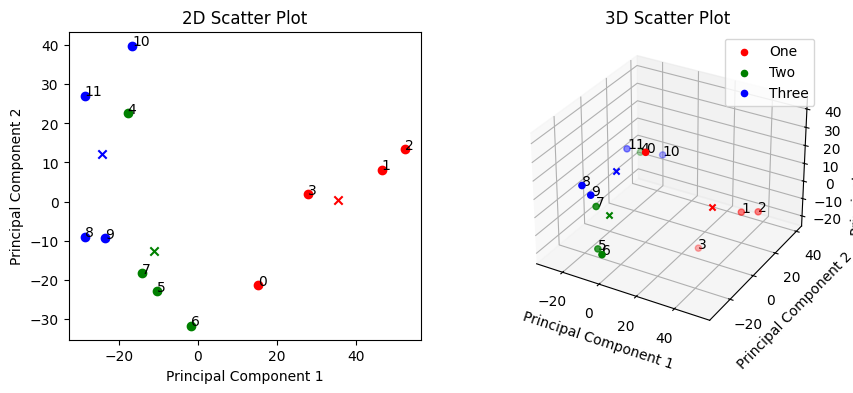

In [64]:
# create subplots
fig = plt.figure(figsize=(10, 4))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red', label='One')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green', label='Two')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue', label='Two')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax1.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))

pca_pos1 = 0
pca_pos2 = 1
pca_pos3 = 2

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='One')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='Two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='Three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')
ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax2.text(data_pca[i, pca_pos1], data_pca[i, pca_pos2], data_pca[i, pca_pos3], str(txt))

plt.legend()
plt.show()

In [65]:
print(pca.explained_variance_)

[8.1574194e+02 5.0804620e+02 2.4925043e+02 1.6043947e+02 1.3490532e+02
 1.2004490e+02 7.4354279e+01 5.8219700e+01 3.3468971e+01 3.0609394e+01
 1.6566339e+01 3.0021458e-11]


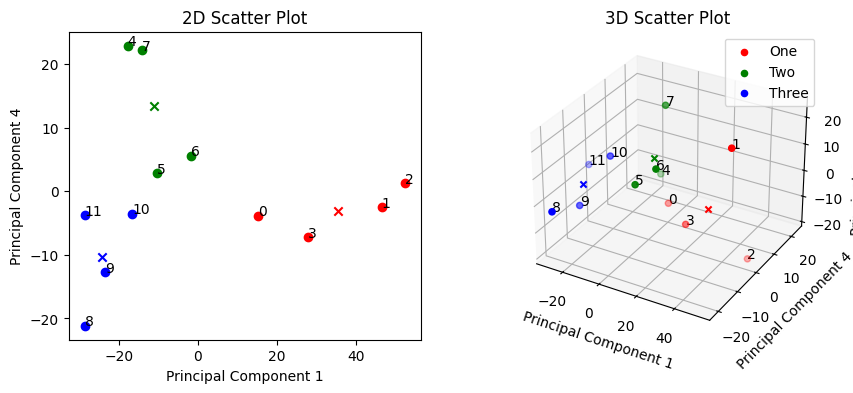

In [66]:
# create subplots
fig = plt.figure(figsize=(10, 4))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 3

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red', label='One')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green', label='Two')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue', label='Two')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 4")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax1.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))

pca_pos1 = 0
pca_pos2 = 3
pca_pos3 = 4

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='One')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='Two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='Three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')
ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 4")
ax2.set_zlabel("Principal Component 5")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax2.text(data_pca[i, pca_pos1], data_pca[i, pca_pos2], data_pca[i, pca_pos3], str(txt))

plt.legend()
plt.show()

In [67]:
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array, mz4_array, hk4_array, mk4_array, ok4_array, mz5_array, hk5_array, mk5_array, ok5_array, mz6_array, hk6_array, mk6_array, ok6_array, mz7_array, hk7_array, mk7_array, ok7_array, mz8_array, hk8_array, mk8_array, ok8_array, mz9_array, hk9_array, mk9_array, ok9_array, mz10_array, hk10_array, mk10_array, ok10_array]

# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)

# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(40, 6, 73)


In [68]:
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 12D
pca = PCA(n_components=40)
data_pca = pca.fit_transform(data_vectors)

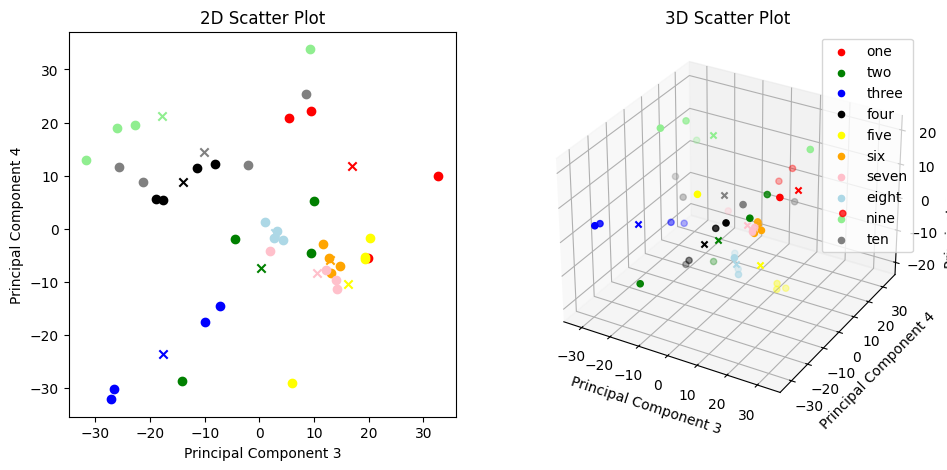

In [69]:
# create subplots
fig = plt.figure(figsize=(11, 5))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)
centre_four = data_pca[12:16].mean(axis=0)
centre_five = data_pca[16:20].mean(axis=0)
centre_six = data_pca[20:24].mean(axis=0)
centre_seven = data_pca[24:28].mean(axis=0)
centre_eight = data_pca[28:32].mean(axis=0)
centre_nine = data_pca[32:36].mean(axis=0)
centre_ten = data_pca[36:40].mean(axis=0)

pca_pos1 = 2
pca_pos2 = 3

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.scatter(data_pca[12:16, pca_pos1], data_pca[12:16, pca_pos2], c='black')
ax1.scatter(centre_four[pca_pos1], centre_four[pca_pos2], c='black', marker='x')
ax1.scatter(data_pca[16:20, pca_pos1], data_pca[16:20, pca_pos2], c='yellow')
ax1.scatter(centre_five[pca_pos1], centre_five[pca_pos2], c='yellow', marker='x')
ax1.scatter(data_pca[20:24, pca_pos1], data_pca[20:24, pca_pos2], c='orange')
ax1.scatter(centre_six[pca_pos1], centre_six[pca_pos2], c='orange', marker='x')
ax1.scatter(data_pca[24:28, pca_pos1], data_pca[24:28, pca_pos2], c='pink')
ax1.scatter(centre_seven[pca_pos1], centre_seven[pca_pos2], c='pink', marker='x')
ax1.scatter(data_pca[28:32, pca_pos1], data_pca[28:32, pca_pos2], c='lightblue')
ax1.scatter(centre_eight[pca_pos1], centre_eight[pca_pos2], c='lightblue', marker='x')
ax1.scatter(data_pca[32:36, pca_pos1], data_pca[32:36, pca_pos2], c='lightgreen')
ax1.scatter(centre_nine[pca_pos1], centre_nine[pca_pos2], c='lightgreen', marker='x')
ax1.scatter(data_pca[36:40, pca_pos1], data_pca[36:40, pca_pos2], c='gray')
ax1.scatter(centre_ten[pca_pos1], centre_ten[pca_pos2], c='gray', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 3")
ax1.set_ylabel("Principal Component 4")

pca_pos1 = 2
pca_pos2 = 3
pca_pos3 = 4

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='one')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')
ax2.scatter(data_pca[12:16, pca_pos1], data_pca[12:16, pca_pos2], data_pca[12:16, pca_pos3], c='black', label='four')
ax2.scatter(centre_four[pca_pos1], centre_four[pca_pos2], centre_four[pca_pos3], c='black', marker='x')
ax2.scatter(data_pca[16:20, pca_pos1], data_pca[16:20, pca_pos2], data_pca[16:20, pca_pos3], c='yellow', label='five')
ax2.scatter(centre_five[pca_pos1], centre_five[pca_pos2], centre_five[pca_pos3], c='yellow', marker='x')
ax2.scatter(data_pca[20:24, pca_pos1], data_pca[20:24, pca_pos2], data_pca[20:24, pca_pos3], c='orange', label='six')
ax2.scatter(centre_six[pca_pos1], centre_six[pca_pos2], centre_six[pca_pos3], c='orange', marker='x')
ax2.scatter(data_pca[24:28, pca_pos1], data_pca[24:28, pca_pos2], data_pca[24:28, pca_pos3], c='pink', label='seven')
ax2.scatter(centre_seven[pca_pos1], centre_seven[pca_pos2], centre_seven[pca_pos3], c='pink', marker='x')
ax2.scatter(data_pca[28:32, pca_pos1], data_pca[28:32, pca_pos2], data_pca[28:32, pca_pos3], c='lightblue', label='eight')
ax2.scatter(centre_eight[pca_pos1], centre_eight[pca_pos2], centre_eight[pca_pos3], c='lightblue', marker='x')
ax2.scatter(data_pca[32:36, pca_pos1], data_pca[32:36, pca_pos2], data_pca[32:36, pca_pos3], c='lightgreen', label='nine')
ax2.scatter(centre_nine[pca_pos1], centre_nine[pca_pos2], centre_nine[pca_pos3], c='lightgreen', marker='x')
ax2.scatter(data_pca[36:40, pca_pos1], data_pca[36:40, pca_pos2], data_pca[36:40, pca_pos3], c='gray', label='ten')
ax2.scatter(centre_ten[pca_pos1], centre_ten[pca_pos2], centre_ten[pca_pos3], c='gray', marker='x')
ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 3")
ax2.set_ylabel("Principal Component 4")
ax2.set_zlabel("Principal Component 5")

plt.legend()
plt.show()

In [70]:
print(pca.explained_variance_)

[6.9885931e+02 3.8781985e+02 2.6585678e+02 2.3451996e+02 1.0552982e+02
 9.7327873e+01 6.8781471e+01 6.0527939e+01 5.2601711e+01 3.8065556e+01
 3.5164890e+01 3.3023895e+01 3.0608744e+01 2.7488033e+01 2.0873671e+01
 1.9416798e+01 1.7266649e+01 1.3166152e+01 1.2685589e+01 1.1954191e+01
 1.0394668e+01 9.0432081e+00 8.3614874e+00 7.3137698e+00 6.5156889e+00
 5.0029554e+00 4.9000902e+00 4.3094363e+00 3.8386602e+00 3.3708501e+00
 2.8097844e+00 2.2196968e+00 2.0397005e+00 1.9619995e+00 1.7564367e+00
 1.6473074e+00 1.3839892e+00 9.7164243e-01 7.0019192e-01 3.9725553e-11]
